# Phasers and the Allpass Filter
In these notebooks we study phaser guitar effects and the allpass filter as an example of how we may integrate data science notebooks into audio algorithm development workflows.

Here the focus is on those workflows; for a more rigorous exploration of the signal processing of phaser effects see:

https://ccrma.stanford.edu/realsimple/DelayVar/Phasing_First_Order_Allpass_Filters.html

## Commercial Phaser Effects
Examples include the MXR Phase 45 (2-stage) and 90 (4-stage), EHX Small Stone (4-stage) and Bad Stone (6-stage), Eventide Instant Phaser, and hundreds more.
We can fetch an example image of a Phase 90 pedal from the web:

In [40]:
from IPython.display import Image
from IPython.core.display import HTML 
# Creative commons license
Image(url="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a8/MXR_M-101_Phase_90_modified.jpg/450px-MXR_M-101_Phase_90_modified.jpg", width=200)

## Phaser Sound

Here we provide an audio sample of an electric piano, with five sections:

* Dry
* Light, 4-stage phaser
* More prominent use, 10-stage phaser
* (Relatively) extreme settings, 12-stage phaer with the feedback dialed up
* Dry loop encore

In [37]:
from IPython import display
display.Audio(filename='phaserdemo.mp3', rate=44100)

## Allpass filters

The phaser effect is obtained by combining an even number of allpass filters with a feedforward gain path. The allpass filters are formed as follows with time-varying parameter $g_i(n)$:

$${\text{Allpass}}_{i} = \frac{g_i + z^{-1}}{1 + g_iz^{-1}}$$

Then we can plot frequency and phase response via $\texttt{SciPy}$ and plot via $\texttt{Matplotlib}$:

In [38]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
g = 0.5
w, h = signal.freqz(b=[g, 1], a=[1, g], worN=1000)

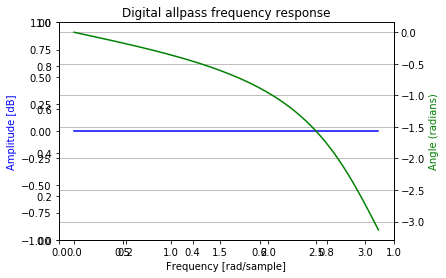

In [39]:
fig = plt.figure()
plt.title('Digital allpass frequency response')
ax1 = fig.add_subplot(111, label='freqresp')
plt.plot(w, 20 * np.log10(abs(h)), 'b')
plt.ylabel('Amplitude [dB]', color='b')
plt.ylim([-1,1])
plt.xlabel('Frequency [rad/sample]')
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
plt.plot(w, angles, 'g')
plt.ylabel('Angle (radians)', color='g')
plt.grid()
plt.axis('tight')
plt.show()

And we can contrast to the second-order allpass section.